In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


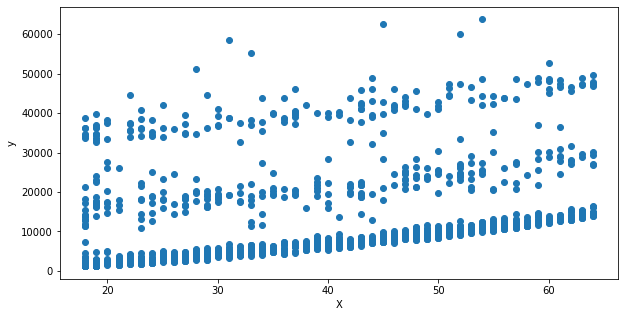

pandas.core.series.Series

In [14]:
x=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
type(x)
#나이와 의료비용 사이의 선형성 발견

In [16]:
#시리즈->ndarray
x=np.array(data['age'])
print(type(x))
y=np.array(data['charges'])
#2차원 array
x=x.reshape(1338, 1)
y=y.reshape(1338, 1)
lr=LinearRegression()
lr.fit(x,y)

<class 'numpy.ndarray'>


LinearRegression()

In [17]:
print("선형 회귀 모델 결과")
print("절편", lr.intercept_, "계수", lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [19]:
#결정계수
print(lr.score(x,y))
#8%로 낮게나온 것을 확인

0.08940589967885804


In [20]:
#새로운 데이터 샘플을 입력
x_new=[[19], [64]]
y_hat=lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


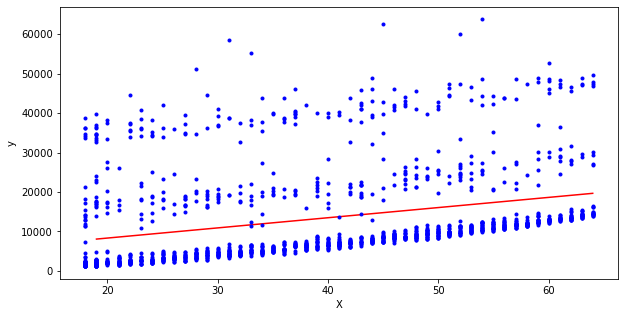

In [25]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r")
#-r:회귀선
plt.plot(x, y, "b.")
#b.:점으로 표현
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## 경사하강법
- SGDRegressor : 확률적 경사하강법 사용

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data=pd.read_csv('insurance.csv')
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338,1)
y=y.reshape(1338,1)

sgd_reg=SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x,y.ravel())

SGDRegressor(random_state=34)

In [28]:
print("SGD 회귀 모델 결과")
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [9057.21833765] 계수 [484.13243757]


In [29]:
#예측
x_new=[[19], [64]]
y_hat=sgd_reg.predict(x_new)
print(y_hat)

[18255.73465154 40041.69434233]


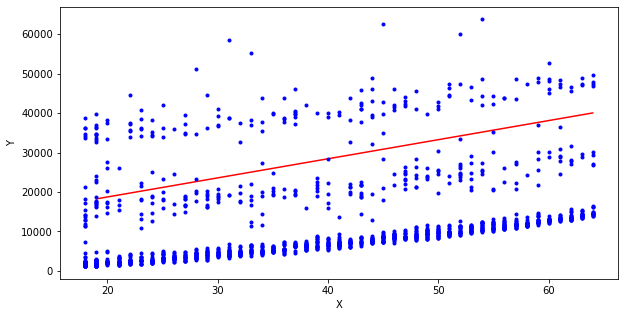

In [30]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x,y,"b.")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()